In [149]:
from numpy import random
import pandas as pd
import numpy as np
import random as rd
from faker import Faker
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib as ptl
from sklearn.preprocessing import MaxAbsScaler
abs_scaler = MaxAbsScaler()
from plotly.subplots import make_subplots



fake = Faker("pt-BR")


In [3]:
def gerar_dados(quantidade_de_vendas = 500, quantidade_de_clientes = 200):

    # Tabela de produtos
    nome_dos_produtos = ["morango", "melancia", "banana", "uva", "batata", "berinjela", "abobrinha", "alface", "couve-flor", "feijão", "arroz", "macarrão"]
    preco_produtos = [7.99, 1.49, 5.99, 7.47, 3.99, 11.99, 3.50, 0.98, 5.48, 8.45, 20.31, 2.48]
    prateleira_dos_produtos = ["1A", "1C", "1B", "1D", "2B", "2D", "2A", "2C", "2E", "3B", "3A", "3C"]
    estoque_produtos = [50, 20, 40, 36, 47, 12, 19, 25, 20, 43, 80, 38]
    unidade_de_medida_estoque = ["bandejas", "unidades", "kg", "bandejas", "kg", "kg", "kg", "pés", "pés", "kg", "kg", "pacotes"]
    imagem = ["morango-alt.png", "melancia.jpg", "banana.png", "uva-alt.png", "batata.JPEG", "beringela.jpg", "abobrinha.JPEG", "alface.png", "couve-flor.png", "feijao.png", "arroz.png", "macarrao.png"]

    produtos = {
        "id": list(range(len(nome_dos_produtos))),
        "nome": nome_dos_produtos,
        "preco": preco_produtos,
        "prateleira": prateleira_dos_produtos,
        "estoque": estoque_produtos,
        "unidade_de_medida_de_estoque": unidade_de_medida_estoque
    }

    produtos = pd.DataFrame(produtos)

    # Tabela de clientes
    clientes = {
        'id': list(range(quantidade_de_clientes)),
        'nome': [],
        'nascimento': [],
        'endereço':[],
        'cpf': [],
        'telefone': [],
        'usuario': [],
        'senha': []
    }

    for id in clientes['id']:
        clientes['nome'].append(fake.name())
        clientes['nascimento'].append(fake.date_of_birth(minimum_age = 18, maximum_age = 73))
        clientes['endereço'].append(fake.address())
        clientes['cpf'].append(fake.cpf())
        clientes['telefone'].append(fake.phone_number())
        clientes['usuario'].append(fake.user_name())
        clientes['senha'].append(fake.password(12))
        
    clientes = pd.DataFrame(clientes)

    # Tabela de vendas
    datas = np.arange(np.datetime64('2021-11-01'), np.datetime64('2021-12-01'))
    probabilidade = np.linspace(1, 2, num=datas.size)
    probabilidade = probabilidade / probabilidade.sum()
    datas = np.random.choice(datas, p=probabilidade, size=quantidade_de_vendas)
    datas.sort()
    vendas = {
        'id' : [],
        'id_cliente' : [],
        'data' : []
    }
    for id, data in enumerate(datas):
        vendas['id'].append(id)
        vendas['id_cliente'].append(np.random.choice(clientes['id']))
        vendas['data'].append(data)

    vendas = pd.DataFrame(vendas)

    # Tabela intermediária entre vendas e produtos
    venda_produtos = {
        'id_vendas' : [],
        'id_produto' : [],
        'quantidade' : []
    }

    for id in range(quantidade_de_vendas):
        venda_produtos['id_vendas'].append(vendas['id'][id])
        venda_produtos['id_produto'].append(np.random.choice(produtos['id']))
        venda_produtos['quantidade'].append(random.randint(1, 5))

    for id in range(4 * quantidade_de_vendas):
        venda_produtos['id_vendas'].append(np.random.choice(clientes['id']))
        venda_produtos['id_produto'].append(np.random.choice(produtos['id']))
        venda_produtos['quantidade'].append(random.randint(1, 5))

    venda_produtos = pd.DataFrame(venda_produtos)

    return (produtos,clientes,vendas,venda_produtos)



In [175]:
produtos = gerar_dados()[0]
clientes = gerar_dados()[1]
vendas = gerar_dados()[2]
venda_produtos = gerar_dados()[3]

## Renda gerada por cada produo

In [176]:
# Selecionando os dados
preco = produtos[['id','preco']]
preco.rename(columns={"id": "id_produto"}, inplace = 1)
venda_preco = pd.merge(venda_produtos, preco, how= 'inner', on= 'id_produto')
# Claculando o total arrecadado por produto
venda_preco['total_ganho'] = venda_preco['quantidade']*venda_preco['preco']
venda_preco_prod = venda_preco.groupby('id_produto').sum()
venda_preco_prod

C:\Users\Pichau\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id_vendas,quantidade,preco,total_ganho
id_produto,,,,
0,28696,545,1685.89,4354.55
1,30399,589,336.74,877.61
2,24142,505,1215.97,3024.95
3,29776,594,1710.63,4437.18
4,29386,568,893.76,2266.32
5,33755,548,2673.77,6570.52
6,24802,527,721.00,1844.50
7,26108,548,204.82,537.04
8,24984,482,1085.04,2641.36


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'morango'),
  Text(1, 0, 'melancia'),
  Text(2, 0, 'banana'),
  Text(3, 0, 'uva'),
  Text(4, 0, 'batata'),
  Text(5, 0, 'berinjela'),
  Text(6, 0, 'abobrinha'),
  Text(7, 0, 'alface'),
  Text(8, 0, 'couve-flor'),
  Text(9, 0, 'feijão'),
  Text(10, 0, 'arroz'),
  Text(11, 0, 'macarrão')])

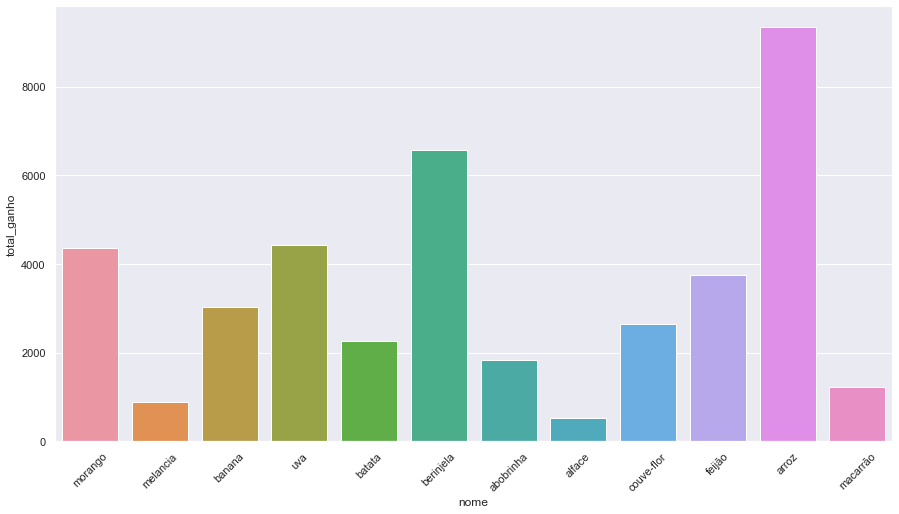

In [177]:
#Organizando os dados
venda_preco_prod['id'] = range(len(venda_preco_prod['total_ganho']))
nome_prod = produtos[['nome', 'id']]
venda_preco_prod = pd.merge(venda_preco_prod, nome_prod, how= 'inner', on= 'id')
#Plotando o gráfico
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x='nome', y="total_ganho", data=venda_preco_prod)
plt.xticks(rotation=45)

## Total ganho por dia da semana

In [178]:
vendas['dia_sem'] = vendas['data'].dt.weekday
venda_preco.rename(columns={"id_vendas": "id"}, inplace = 1)
vendas_dia = pd.merge(vendas, venda_preco, how= 'inner', on= 'id')

In [182]:
total_gasto_sem = vendas_dia.groupby(['dia_sem']).sum()
total_gasto_sem['dia'] = range(len(total_gasto_sem['total_ganho']))
#Plotando Gráfico
fig = px.bar(total_gasto_sem,
             x='dia', y="total_ganho", height=700, width=700,
             barmode='stack')
fig.update_layout(title = 'Ganhos totais por dia da semana')
fig.update_xaxes(title = 'Dia da semana')
fig.update_yaxes(title = 'Total gasto')
fig.show()

## Produtos mais vendidos em cada dia da semana

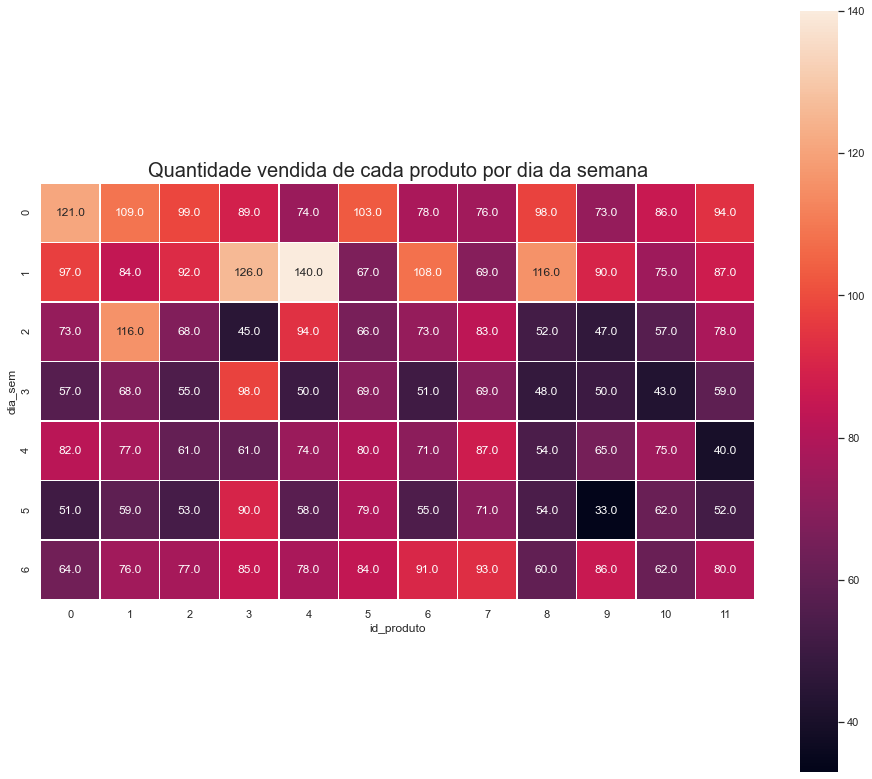

In [183]:
quantidade_vendida_dia = vendas_dia.pivot_table('quantidade', index='dia_sem', columns='id_produto', aggfunc=sum)
f,ax = plt.subplots(figsize=(16, 14))
sns.heatmap(quantidade_vendida_dia, cbar = True,  square = True, annot = True, fmt= '.1f', 
            xticklabels= True, yticklabels= True, linewidths=.5, ax=ax)

plt.title('Quantidade vendida de cada produto por dia da semana', size=20);

In [186]:
#Selecionando os dados
vendas_dia_quant = vendas_dia.drop(['id','id_cliente','preco', 'total_ganho'],axis=1)
nome_prod.rename(columns={"id": "id_produto"}, inplace = 1)
# Adiconando os nomes dos produtos
vendas_dia2 = pd.merge(vendas_dia, nome_prod, how= 'inner', on= 'id_produto')
# Imprimindo a tabela
quantidade_vendida_dia = vendas_dia2.pivot_table('quantidade', index='dia_sem', columns='nome', aggfunc=sum)
print("Produtos mais vendidos por dia da semana :")
quantidade_vendida_dia.idxmax(axis=1)

Produtos mais vendidos por dia da semana :


C:\Users\Pichau\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dia_sem
0     morango
1      batata
2    melancia
3         uva
4      alface
5         uva
6      alface
dtype: object

## Evolução das vendas no mês de novembro

In [187]:
# Selecionando os dados
vendas_mensais = vendas_dia.groupby('data').sum()
ganhos_mensais = vendas_mensais[['total_ganho','quantidade']]
vendas_mensais

,id,id_cliente,dia_sem,id_produto,quantidade,preco,total_ganho
data,,,,,,,
2021-11-01,546,13811,0,528,243,692.69,1642.36
2021-11-02,1860,10216,119,651,283,752.84,1866.74
2021-11-03,4850,15281,334,907,429,1011.08,2725.29
2021-11-04,4691,13940,342,639,296,686.77,1829.54
2021-11-05,4202,8552,340,457,219,519.45,1362.48
2021-11-06,7313,15127,620,688,306,833.34,1977.25
2021-11-07,15536,20451,1272,1167,517,1325.81,3279.48
2021-11-08,13456,20184,0,790,366,969.24,2370.31
2021-11-09,13225,11371,129,687,330,813.58,2096.73


In [188]:
#Normalizando os dados
abs_scaler = MaxAbsScaler()
abs_scaler.fit(ganhos_mensais)
abs_scaler.max_abs_
scaled_data = abs_scaler.transform(ganhos_mensais)
df_scaled = pd.DataFrame(scaled_data, columns=ganhos_mensais.columns)
df_scaled.transpose()
# PLotand o gráfico
fig = px.line(ganhos_mensais, title="Quantidade consumida e renda diária no mês de novembro")
fig.show()

fig = px.line(df_scaled, title="Quantidade e renda na mesma escala, no mês de novembro")
fig.show()